## Original Code is inside *Silant Problem Oversampling EfficientNet*

In [1]:
import torch
import torch.nn
import torchvision

from torch import nn
from torchvision import transforms
from PIL import Image

import matplotlib.pyplot as plt
 
import os
import random
import shutil
print(f"torch version : {torch.__version__}")

torch version : 2.5.1


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from pytorch_modules.pytorch_modules import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/DutchVandaline/Artificial_Intelligence.git
    !mv Artificial_Intelligence/pytorch_modules .
    !mv Artificial_Intelligence/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from pytorch_modules.pytorch_modules import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

182
1585
46
397


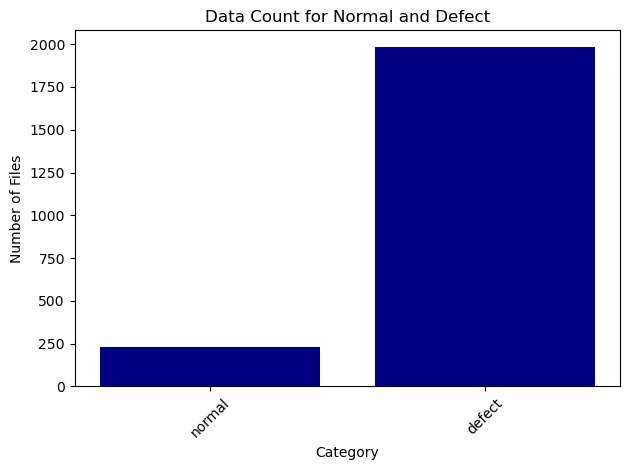

In [21]:
base_path = "C:/junha/Sealant_Problem/data"
categories = ["normal", "defect"]
subfolders = ["train", "test"]

# 데이터 개수 저장
data_counts = {category: 0 for category in categories}

# 데이터 개수 세기
for subfolder in subfolders:
    for category in categories:
        folder_path = os.path.join(base_path, subfolder, category)
        if os.path.exists(folder_path):
            num_files = len(os.listdir(folder_path))
            data_counts[category] += num_files
            print(num_files)


# 그래프 그리기
plt.bar(data_counts.keys(), data_counts.values(), color=['navy', 'navy'])
plt.title("Data Count for Normal and Defect")
plt.xlabel("Category")
plt.ylabel("Number of Files")
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 저장 및 표시
plt.savefig("data_count_plot.png")
plt.show()


## Cut 20 / 20 images randomly from defect and normal for final training
I am selecting 20 images each for final validation. It's for checking.

In [6]:
base_path = "oversampling_data/train"
categories = ["normal", "defect"]
num_files_to_extract = 10


output_path = "z_keep_out_for_final_test"
os.makedirs(output_path, exist_ok=True)

for category in categories:
    category_path = os.path.join(base_path, category)
    output_category_path = os.path.join(output_path, category)
    os.makedirs(output_category_path, exist_ok=True)
    
    # 파일 목록 가져오기
    files = os.listdir(category_path)
    if len(files) < num_files_to_extract:
        print(f"Warning: '{category_path}'에는 {num_files_to_extract}개보다 적은 파일이 있습니다.")
    
    # 무작위로 파일 선택
    selected_files = random.sample(files, min(len(files), num_files_to_extract))
    
    # 파일 이동
    for file_name in selected_files:
        src_file = os.path.join(category_path, file_name)
        dest_file = os.path.join(output_category_path, file_name)
        shutil.move(src_file, dest_file)
        print(f"Moved: {src_file} -> {dest_file}")

print("추출 작업이 완료되었습니다!")


Moved: oversampling_data/train\normal\20240823_101805.jpg -> z_keep_out_for_final_test\normal\20240823_101805.jpg
Moved: oversampling_data/train\normal\20240823_101705.jpg -> z_keep_out_for_final_test\normal\20240823_101705.jpg
Moved: oversampling_data/train\normal\20240823_102756.jpg -> z_keep_out_for_final_test\normal\20240823_102756.jpg
Moved: oversampling_data/train\normal\20240823_102907.jpg -> z_keep_out_for_final_test\normal\20240823_102907.jpg
Moved: oversampling_data/train\normal\20240823_101930.jpg -> z_keep_out_for_final_test\normal\20240823_101930.jpg
Moved: oversampling_data/train\normal\20240823_102924.jpg -> z_keep_out_for_final_test\normal\20240823_102924.jpg
Moved: oversampling_data/train\normal\20240823_102759.jpg -> z_keep_out_for_final_test\normal\20240823_102759.jpg
Moved: oversampling_data/train\normal\20240823_102606.jpg -> z_keep_out_for_final_test\normal\20240823_102606.jpg
Moved: oversampling_data/train\normal\20240823_102257.jpg -> z_keep_out_for_final_test\n

### Make Augmented images for Train Normal

In [14]:
normal_folder = os.path.join("C:/junha/Sealant_Problem/oversampling_data/train/normal")
print(normal_folder)
save_dir = normal_folder

# 증강된 이미지 저장 폴더 생성
if not os.path.exists(save_dir):
    os.makedirs(save_dir)


def augment_image(image):
    augmentation = transforms.Compose([
        transforms.RandomAffine(
            degrees=8,  # ±8도 회전
            translate=(0.03, 0.03),  # ±3% 범위 이동
            scale=(0.95, 1.05),  # ±5% 범위 스케일 조절
        ),
        transforms.ToTensor(),
        transforms.ToPILImage()
    ])
    return augmentation(image)


# 폴더 내 모든 이미지에 대해 무작위 증강 수행
for filename in os.listdir(normal_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(normal_folder, filename)
        original_image = Image.open(img_path)
        base_name = os.path.splitext(filename)[0]

        # 각 이미지에 대해 랜덤 증강 개수 지정 (예: 5~10 사이 랜덤 증강)
        num_augments = random.randint(5, 10)
        for i in range(num_augments):
            augmented_image = augment_image(original_image)
            save_path = os.path.join(save_dir, f"{base_name}_aug_{i + 1}.jpg")
            augmented_image.save(save_path)
            print(f"Saved augmented image: {save_path}")

print("All images have been randomly augmented and saved.")

C:/junha/Sealant_Problem/oversampling_data/train/normal
Saved augmented image: C:/junha/Sealant_Problem/oversampling_data/train/normal\20240823_101538_aug_1.jpg
Saved augmented image: C:/junha/Sealant_Problem/oversampling_data/train/normal\20240823_101538_aug_2.jpg
Saved augmented image: C:/junha/Sealant_Problem/oversampling_data/train/normal\20240823_101538_aug_3.jpg
Saved augmented image: C:/junha/Sealant_Problem/oversampling_data/train/normal\20240823_101538_aug_4.jpg
Saved augmented image: C:/junha/Sealant_Problem/oversampling_data/train/normal\20240823_101538_aug_5.jpg
Saved augmented image: C:/junha/Sealant_Problem/oversampling_data/train/normal\20240823_101538_aug_6.jpg
Saved augmented image: C:/junha/Sealant_Problem/oversampling_data/train/normal\20240823_101538_aug_7.jpg
Saved augmented image: C:/junha/Sealant_Problem/oversampling_data/train/normal\20240823_101538_aug_8.jpg
Saved augmented image: C:/junha/Sealant_Problem/oversampling_data/train/normal\20240823_101538_aug_9.jpg

In [15]:
image_path = "C:/junha/Sealant_Problem/oversampling_data"

In [16]:
def walk_through_dir(dir_path):
    """ Walks through dir_path returning its conents."""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directoreis and {len(filenames)} images in '{dirpath}'.")
walk_through_dir(image_path)

There are 3 directoreis and 0 images in 'C:/junha/Sealant_Problem/oversampling_data'.
There are 2 directoreis and 0 images in 'C:/junha/Sealant_Problem/oversampling_data\test'.
There are 0 directoreis and 397 images in 'C:/junha/Sealant_Problem/oversampling_data\test\defect'.
There are 0 directoreis and 46 images in 'C:/junha/Sealant_Problem/oversampling_data\test\normal'.
There are 2 directoreis and 0 images in 'C:/junha/Sealant_Problem/oversampling_data\train'.
There are 0 directoreis and 1575 images in 'C:/junha/Sealant_Problem/oversampling_data\train\defect'.
There are 0 directoreis and 1438 images in 'C:/junha/Sealant_Problem/oversampling_data\train\normal'.
There are 2 directoreis and 0 images in 'C:/junha/Sealant_Problem/oversampling_data\z_keep_out_for_final_test'.
There are 0 directoreis and 10 images in 'C:/junha/Sealant_Problem/oversampling_data\z_keep_out_for_final_test\defect'.
There are 0 directoreis and 10 images in 'C:/junha/Sealant_Problem/oversampling_data\z_keep_out_

## Split Data by 80% / 20%

In [ ]:
base_dir = 'C:/junha/Personal_Notebook/oversampling_data'
train_dir = 'C:/junha/Personal_Notebook/oversampling_data/train'
test_dir = 'C:/junha/Personal_Notebook/oversampling_data/test'

# Create train and test directories
os.makedirs(os.path.join(train_dir, 'defect'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'normal'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'defect'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'normal'), exist_ok=True)


# Function to split the dataset
def split_data(source_dir, train_dir, test_dir, split_ratio=0.8):
    # Get all files in the source directory
    files = os.listdir(source_dir)
    random.shuffle(files)

    # Split the files based on the ratio
    train_size = int(len(files) * split_ratio)

    train_files = files[:train_size]
    test_files = files[train_size:]

    # Copy files to the train directory
    for file in train_files:
        shutil.copy(os.path.join(source_dir, file), os.path.join(train_dir, file))

    # Copy files to the test directory
    for file in test_files:
        shutil.copy(os.path.join(source_dir, file), os.path.join(test_dir, file))


# Split defect and normal datasets
split_data(os.path.join(base_dir, 'defect'), os.path.join(train_dir, 'defect'), os.path.join(test_dir, 'defect'))
split_data(os.path.join(base_dir, 'normal'), os.path.join(train_dir, 'normal'), os.path.join(test_dir, 'normal'))

print("Data split completed successfully.")